<center><h2> Gravitational lens </h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
    
<p>
    Moore "A General Relativity Workbook" (pages.pomona.edu$/$~tmoore$/$wgr$/$)</center>
    The equation describing the deflection of a photon by mass M in   Scharzchild spacetime with $u=1/r$ is solved:
$$
\frac{d^2 u}{d\phi^2} = 3GM\,u^2-u,
\label{equa1}
$$ 

<IPython.core.display.Javascript object>


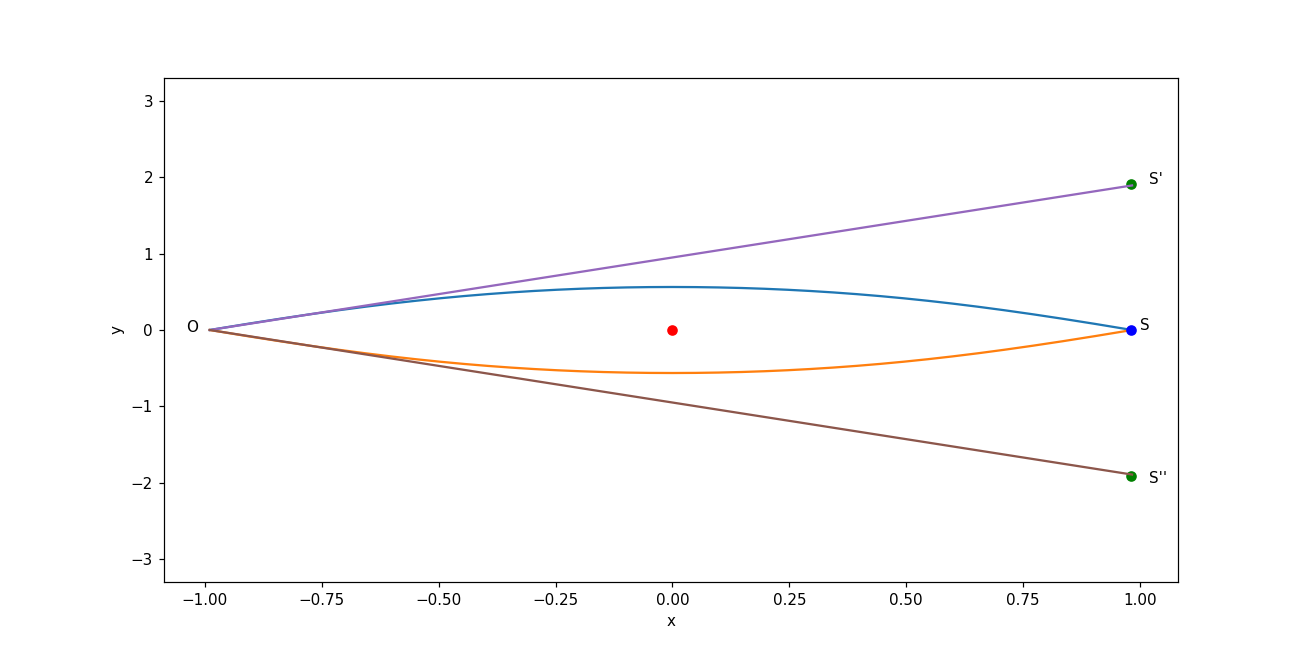

In [1]:
# GravLens.py: deflection of light by a mass

% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt  

y  = np.zeros((2),float)
ph = np.zeros((181),float)             
yy = np.zeros((181),float)            
xx = np.zeros((181),float)
rx = np.zeros((181),float)
ry = np.zeros((181),float)

Gsun = 4477.1     # meters,  sum mass * G
GM = 28.* Gsun    # mass  
y[0] = 1.e-6      # Initial u = 1/r, r close to 0
y[1] = 1e-6

def f(t,y):                               # RHS equation
    rhs = np.zeros((2),float)              
    rhs[0] = y[1]
    rhs[1] = 3*GM*(y[0]**2)-y[0]
    return rhs

def rk4Algor(t, h, N, y, f):
    k1 = np.zeros(N); k2 = np.zeros(N); k3 = np.zeros(N); k4 = np.zeros(N);
    k1  =  h*f(t,y)                             
    k2  =  h*f(t+h/2.,y+k1/2.)
    k3 =  h*f(t+h/2.,y+k2/2.)
    k4 =  h*f(t+h,y+k3)
    y = y+(k1+2*(k2+k3)+k4)/6.
    return y    
    
f(0,y)              # initialize
dphi = np.pi/180.   # 180 values of angle phi
i = 0               

for phi  in np.arange(0,np.pi+dphi,dphi):    
    ph[i] = phi
    y = rk4Algor(phi,dphi,2,y,f)    # rk4
    xx[i] = np.cos(phi)/y[0]/1000000 # scale for graph 
    yy[i] = np.sin(phi)/y[0]/1000000 # scale for graph 
    i = i+1                           

m  = (yy[180] - yy[165])/(xx[180]-xx[165])   # slope of straight line
b =  yy[180]-m*xx[180]                       # intercept of straight line
j = 0

for phi  in np.arange(0,np.pi+dphi,dphi):  
    ry[j] = m*xx[j]+b                 #
    j = j+1
    
plt.figure(figsize = (12,6))
plt.plot(xx,yy)  #light tajectroy values to plot straight line (y)
plt.plot(xx,-yy)  #symmetric light trajectory
plt.plot(0,0,'ro')        # here is the mass at origin
plt.plot(0.98,0,'bo')       # here is the source
plt.plot(0.98,1.91,'go')       # aparent position of source as seen by O
plt.plot(0.98,-1.91,'go')      # aparent position of source seen from O
plt.text(1,0,'S')
plt.text(-1.04,-0.02,'O')
plt.text(1.02, 1.91,"S' ")
plt.text(1.02,-2,"S''")
plt.plot([0],[3.])   # point invisible  to make scale in y bigger 
plt.plot([0],[-3.])  # invisible point at -y
plt.plot(xx,ry)      #straight line superior
plt.plot(xx,-ry)     # inferior straight line
plt.xlabel('x')
plt.ylabel('y')
plt.show()